In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PRE-PROCESSING

In [2]:
data = pd.read_csv('dataset.csv', delimiter='\t')

In [3]:
df =data.copy()

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
# verification de données manquantes en %

(df.isna().sum()/df.shape[0]).sort_values()*100

ID                     0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
MntGoldProds           0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
Response               0.000000
Income                 1.071429
dtype: float64

* Je suprime les lignes où il y a les données manquantes car elles ne sont pas assez

In [6]:
# suppression des données manquantes
df.dropna(axis=0, inplace=True)

In [7]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

* l'[ID] du client et sa date d'inscription [Dt_Customer] ne sont pas des valeurs pertinentes pour la segmentation des clients, ici dans notre étude. Donc nous décidobns de les retrancher


In [8]:
# suppression de l'ID client et de Dt_Customer
df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

In [9]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [10]:
# verification des donnees qualit
donnees_quali = df.select_dtypes(include="object").columns

In [11]:
donnees_quali

Index(['Education', 'Marital_Status'], dtype='object')

In [12]:
# verification des donnees quanti
donnees_quanti = df.select_dtypes(include="number").columns
donnees_quanti

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

* A ce niveau je me rends compte que certaines valeurs encodés 0, 1, 2, 3... ont été classées en variables quantitaves. 
Or ce sont des variables qualitatives. Donc nous décidons de reconstituer notre dataframe selon en classant chaque variable dans
dans son genre

In [13]:
var_qualit = df[['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
var_qualit

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Graduation,Single,0,0,0,0,0,0,1
1,Graduation,Single,0,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0,0
4,PhD,Married,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,0,0,0,0,0,0,0
2236,PhD,Together,0,1,0,0,0,0,0
2237,Graduation,Divorced,0,0,0,0,1,0,0
2238,Master,Together,0,0,0,0,0,0,0


In [14]:
var_quant = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']]
var_quant

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,3,11
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,3,11
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,3,11
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,3,11
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,3,11
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,3,11
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,3,11
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,3,11


### Encodage des variables qualitatives

In [15]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [16]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

### TrainTest - Nettoyage - Encodage

In [17]:
def encodage(df):
    code = {'Graduation':0,
            'PhD':1,
            'Master':2,
            '2n Cycle':3,
            'Basic':4,
            'Married':0,
            'Together':1,
            'Single':2,
            'Divorced':3,
            'Widow':5,
            'Alone':5,
            'Single':1,
            'YOLO':6,
            'Absurd':7,
            }
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)
   
    return df


In [18]:
encodage(df)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,0,1,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,0,1,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,0,1,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,0,1,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,1,0,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0,0,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,1,1,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,0,3,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,2,1,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


In [19]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,0,1,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,0,1,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,0,1,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,0,1,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,1,0,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


### Standardiser les variables

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
col_names = ['Education', 'Marital_Status', 'Complain', 'AcceptedCmp1', 'AcceptedCmp2',  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,-0.820981,0.020753,-0.097812,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,2.377952
1,-0.820981,0.020753,-0.097812,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530
2,-0.820981,0.020753,-0.097812,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530
3,-0.820981,0.020753,-0.097812,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530
4,0.076549,-0.815390,-0.097812,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530


## Visualisation graphique des variables

### 1. Variables qualitatives

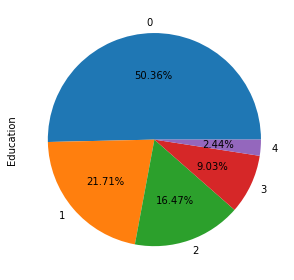

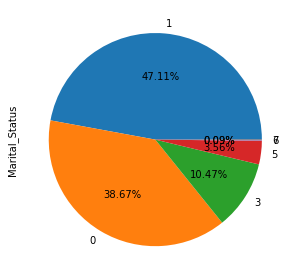

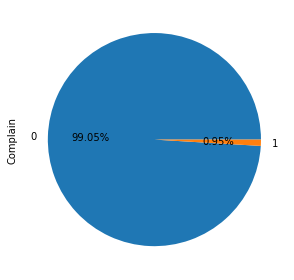

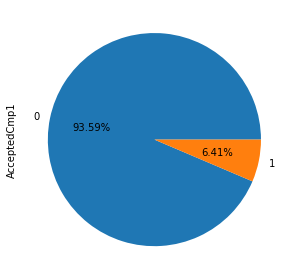

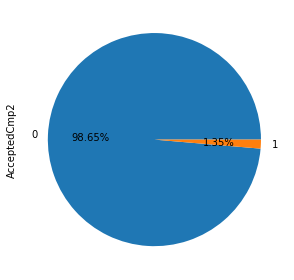

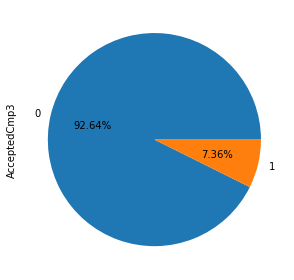

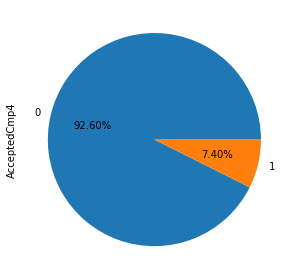

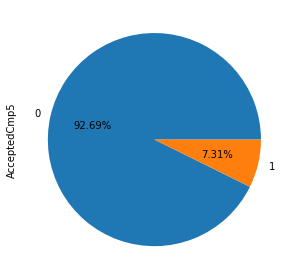

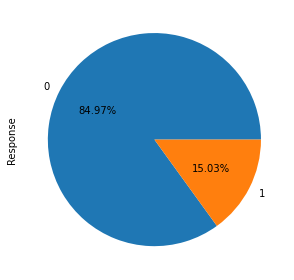

In [22]:
# Viusalisation des variables qualit

for col in var_qualit:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.2f%%')
    plt.tight_layout()

### 2. Variables quantitatives

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

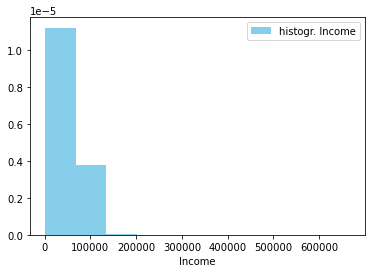

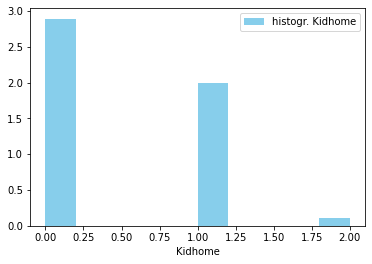

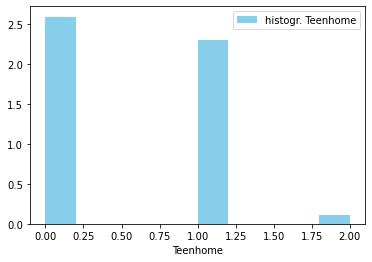

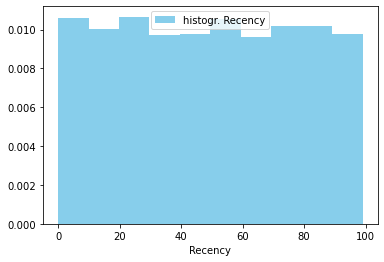

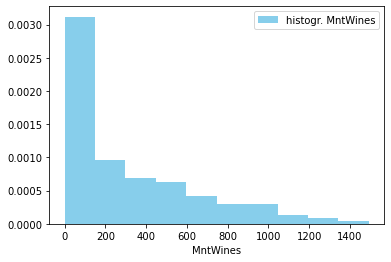

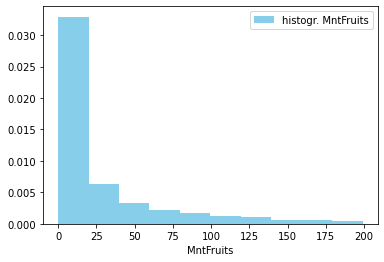

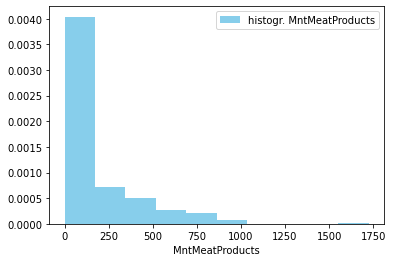

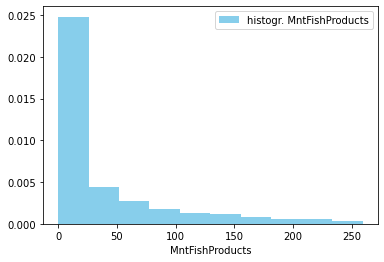

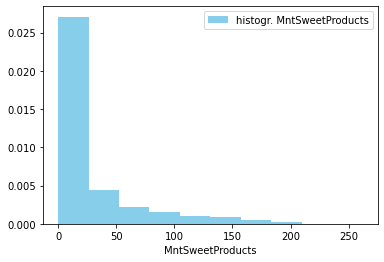

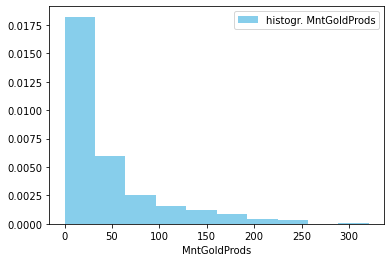

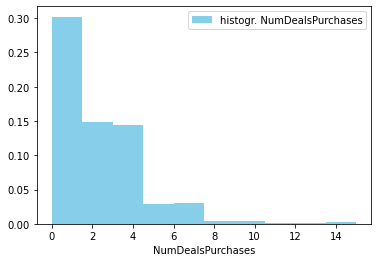

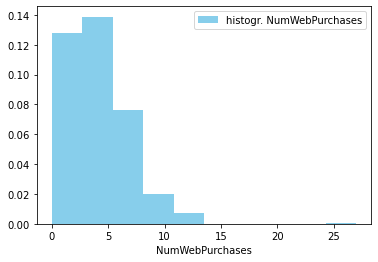

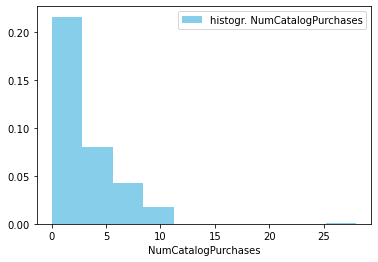

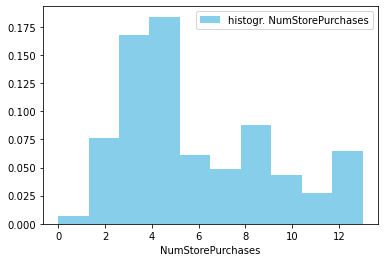

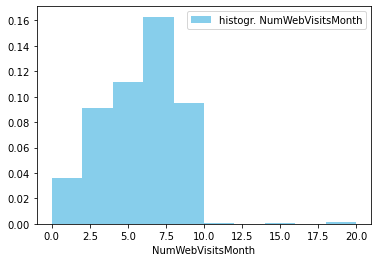

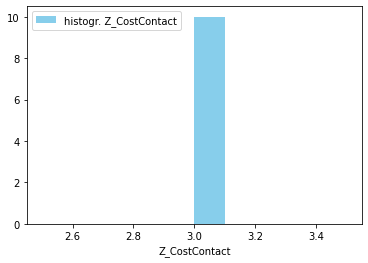

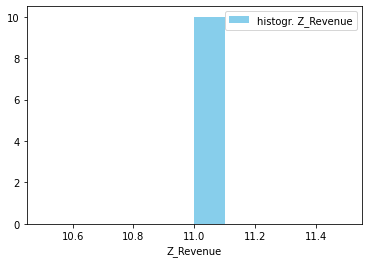

In [24]:
for col in var_quant:
    plt.figure()
    plt.hist(var_quant[col], bins=10, density=True, label= 'histogr. '+col, color='skyblue')
    #var_quant[col].plot(kind ="density", label = 'densité ' + col)
    plt.xlabel(col)
    
    plt.legend()
